In [1]:
# Import Libaries and Tools
import os
import glob
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 30})

ROOT_DIR = os.path.abspath("../../")

In [2]:
# Key Varibles
cr = 'CR2133'

# Data Summary
datasetFile = 'Results/' + cr + '.csv.ScaleStats.npz'

In [3]:
# Open data summary
data = np.load(datasetFile, allow_pickle=True)
lst = data.files

alphas = data[lst[0]]
IOU    = data[lst[1]]
SSIM   = data[lst[2]]
GCE    = data[lst[3]]
LCE    = data[lst[4]]

In [4]:
# File Checks

print('Number of Entries: ',len(alphas))
print()
errorEntry = np.where(alphas!=0.3)[0]
print('List of Entries where alpha paramter was adjusted')
print(errorEntry)

Number of Entries:  618

List of Entries where alpha paramter was adjusted
[]


In [5]:
# Establish Lables

# Upscale Methods
upscale = ['Nearest-neighbor','Bi-linear','Bi-quadratic','Bi-cubic','Bi-quartic','Bi-quintic']

# Scale Methods
keysFormated = ['Half Scale','Quarter Scale','Eighth Scale']

In [6]:
# Ensure Folder Exists
saveDirectory = '/Figures/ScaleConstancy/'
saveDirectory = ROOT_DIR + saveDirectory

if not os.path.exists(saveDirectory):
    os.makedirs(saveDirectory)

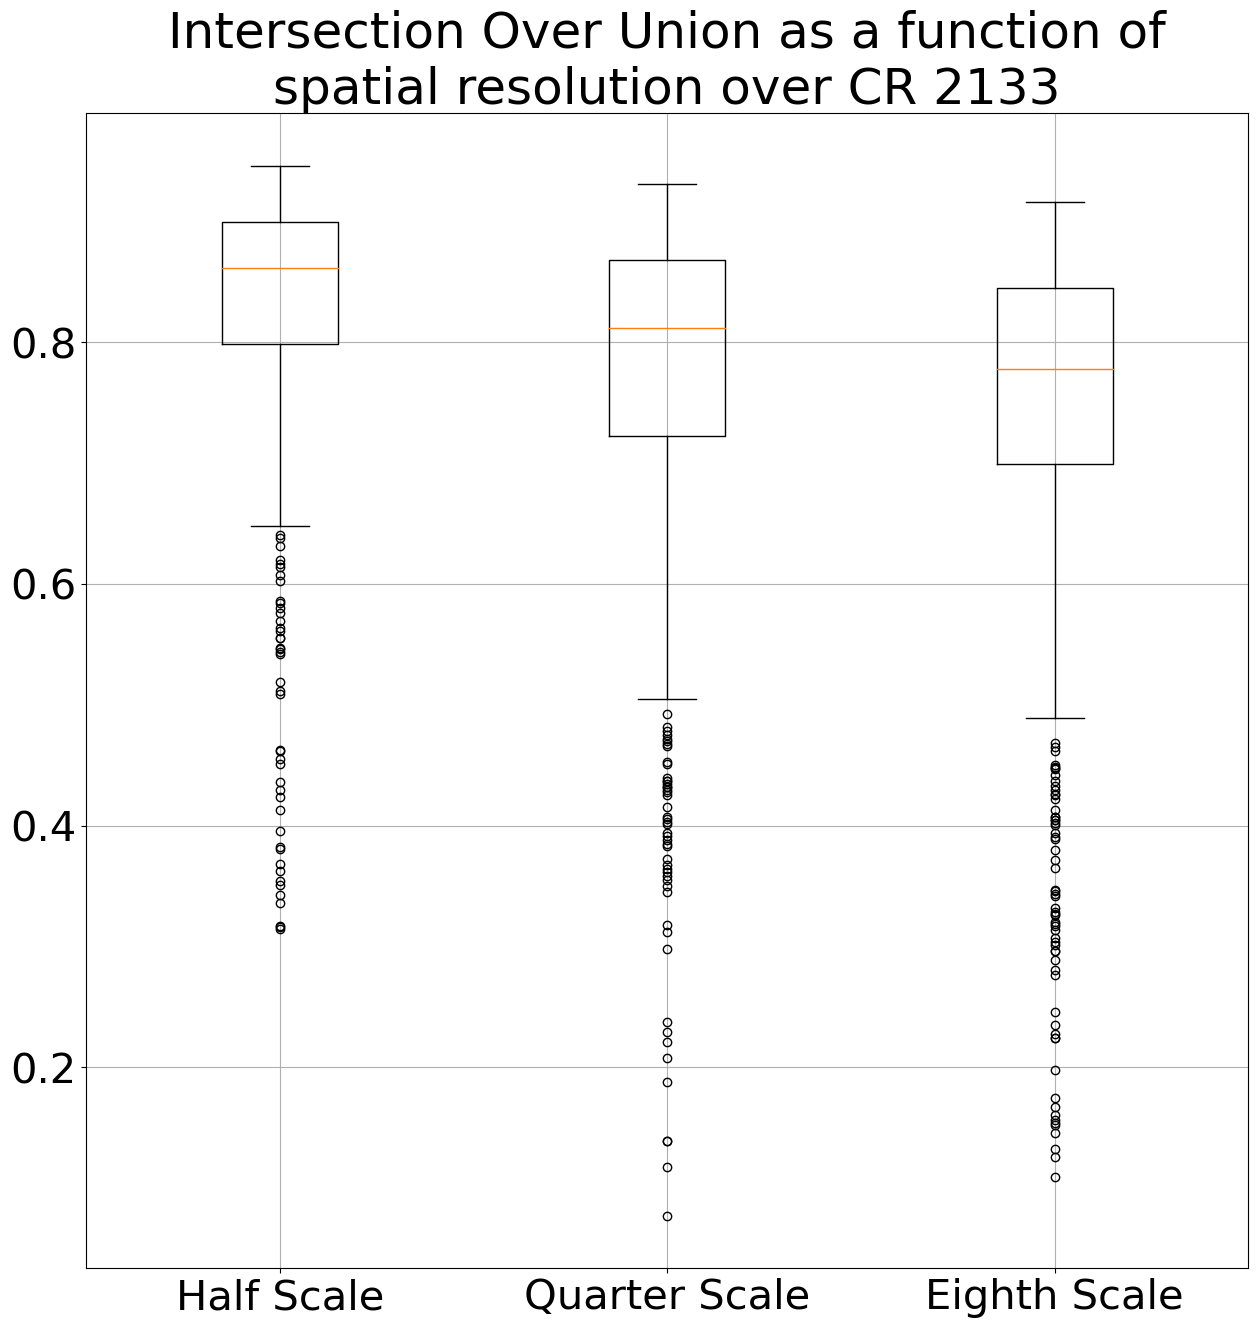

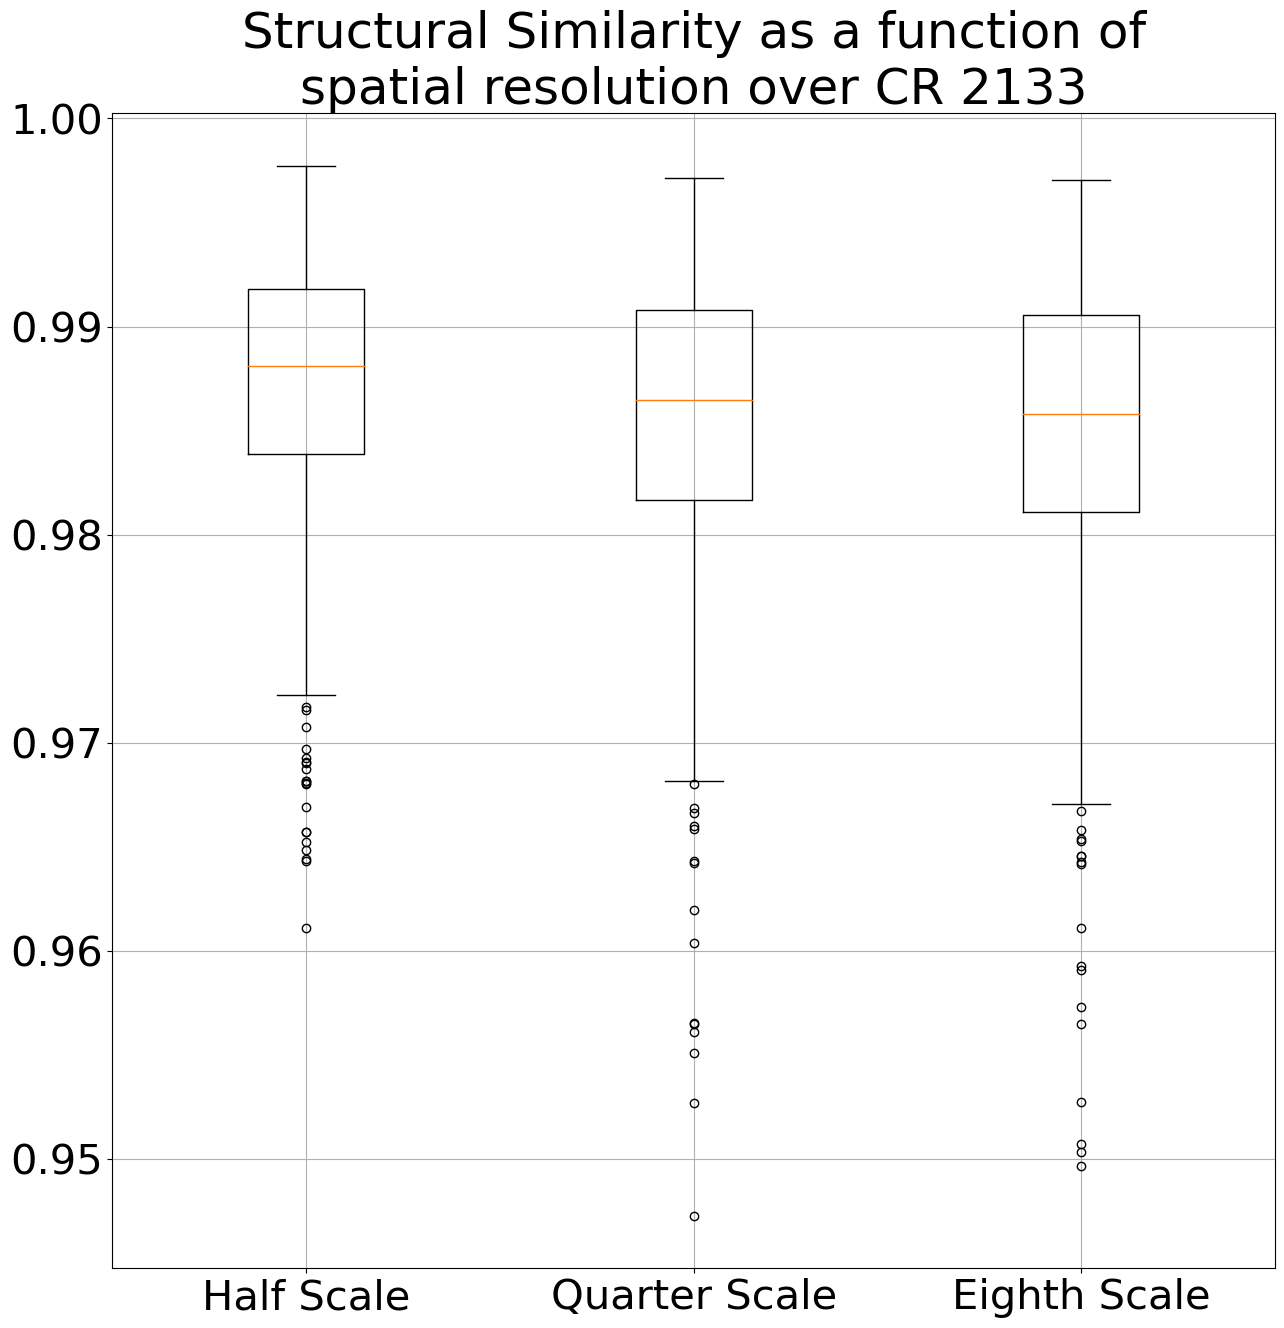

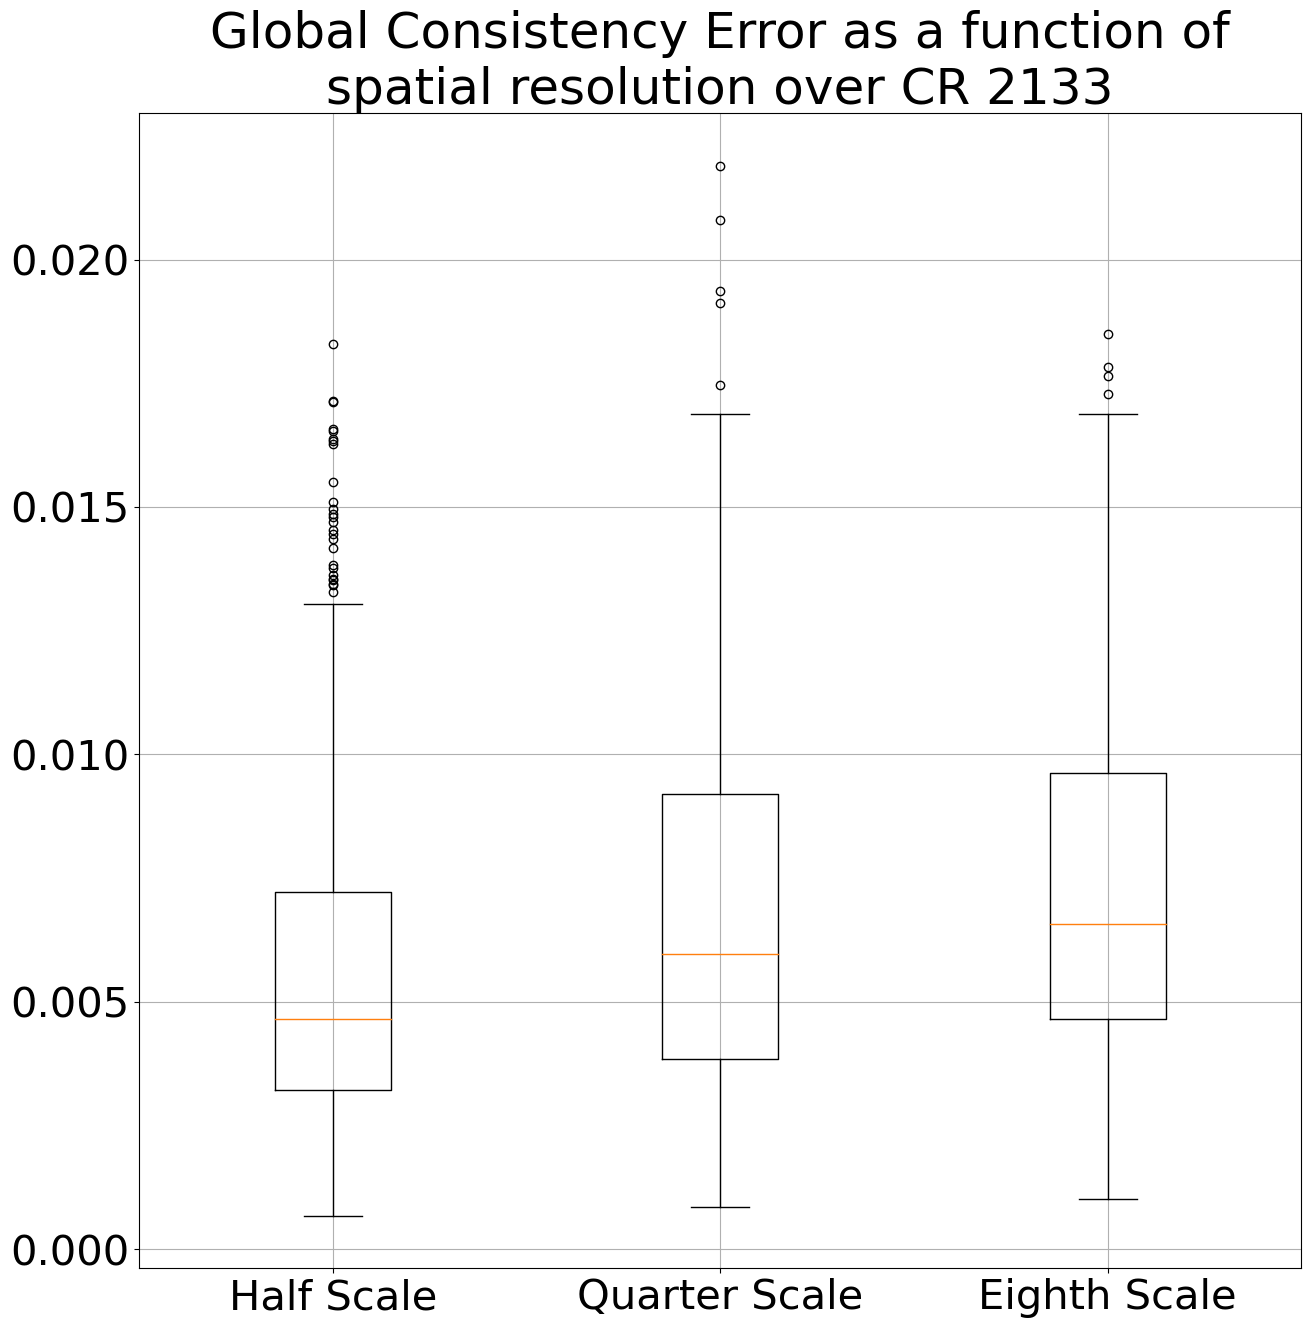

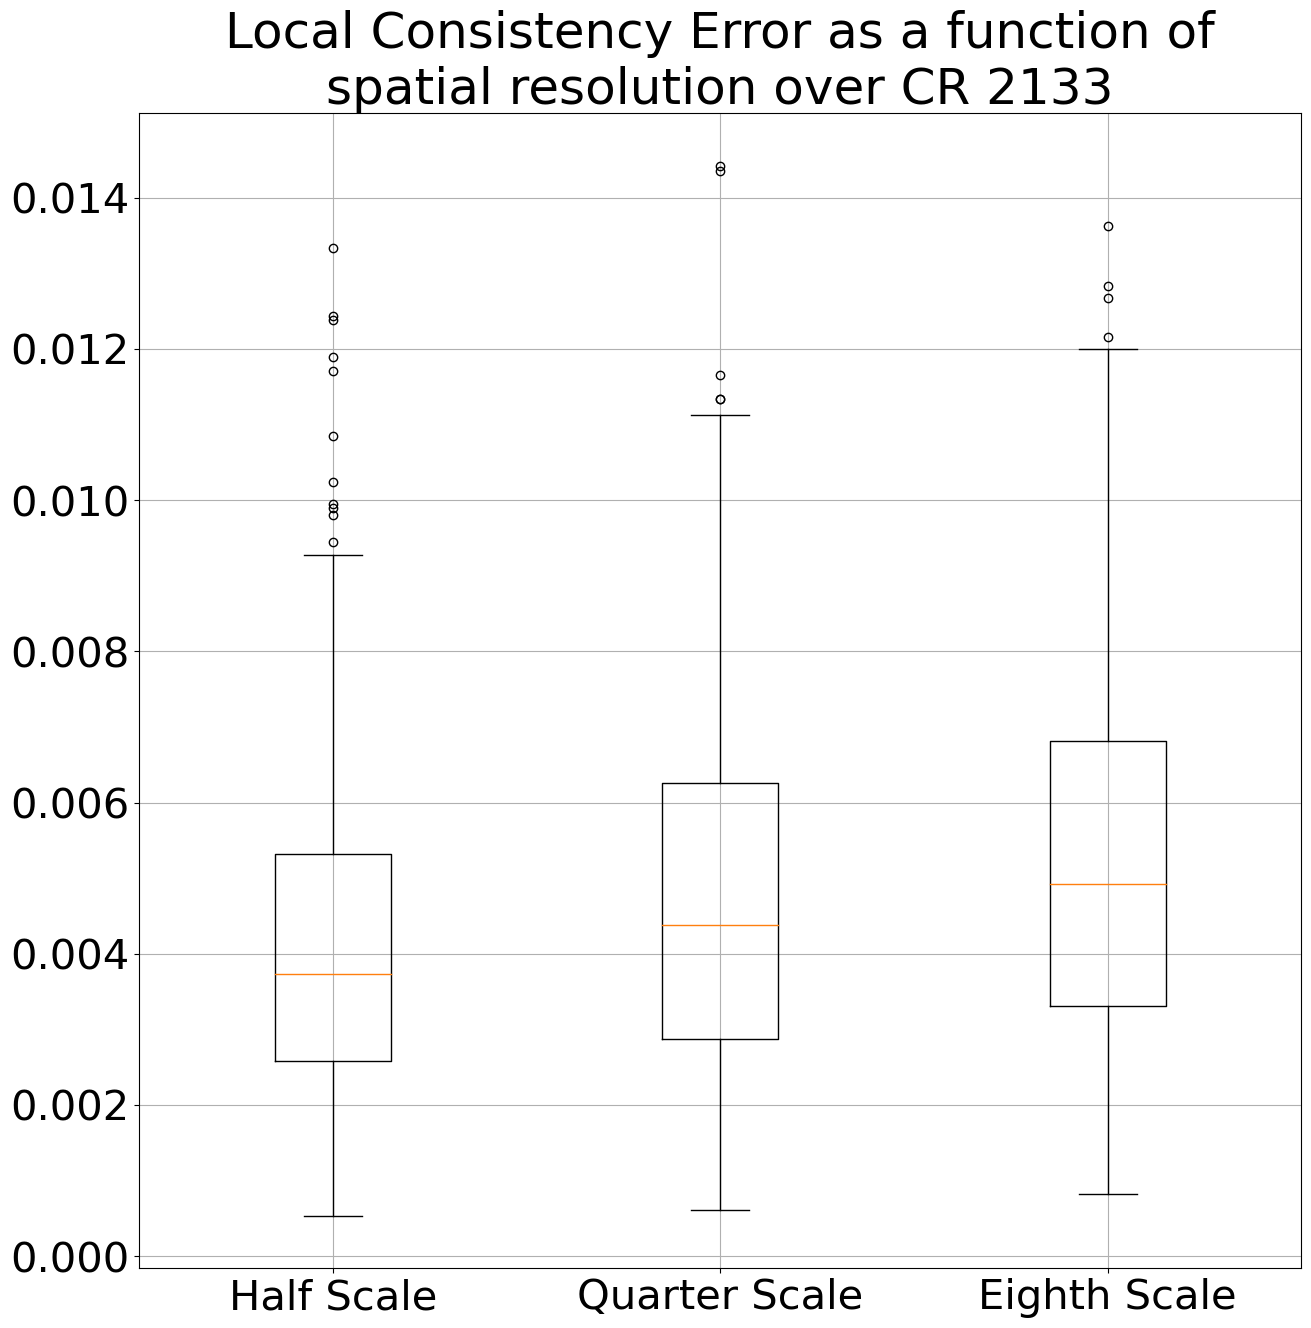

In [7]:
# Plots for Bi-linear Interploation

# Extract Data for Bi-linear Interploation
IOUbiLinear  = IOU[:,:,1]
SSIMbiLinear = SSIM[:,:,1]
GCEbiLinear  = GCE[:,:,1]
LCEbiLinear  = LCE[:,:,1]

# Set up lables
x = np.arange(len(keysFormated)) + 1

# Plot and save results - IOU
plt.figure(figsize=[15,15])
title = 'Intersection Over Union as a function of\nspatial resolution over CR '
title = title + cr[2:]
plt.rcParams.update({'font.size': 30})
plt.title(title)
plt.boxplot(IOUbiLinear)
plt.xticks(x,keysFormated)
plt.grid()
title = saveDirectory + 'IOU_Box_' + cr + '.eps'
plt.savefig(title)
plt.show()

# Plot and save results - SSIM
plt.figure(figsize=[15,15])
title = 'Structural Similarity as a function of\nspatial resolution over CR '
title = title + cr[2:]
plt.title(title)
plt.boxplot(SSIMbiLinear)
plt.xticks(x,keysFormated)
plt.grid()
title = saveDirectory + 'SSIM_Box_' + cr + '.eps'
plt.savefig(title)
plt.show()

# Plot and save results - GCE
plt.figure(figsize=[15,15])
title = 'Global Consistency Error as a function of\nspatial resolution over CR '
title = title + cr[2:]
plt.title(title)
plt.boxplot(GCEbiLinear)
plt.xticks(x,keysFormated)
plt.grid()
title = saveDirectory + 'GCE_Box_' + cr + '.eps'
plt.savefig(title)
plt.show()

# Plot and save results - LCE
plt.figure(figsize=[15,15])
title = 'Local Consistency Error as a function of\nspatial resolution over CR '
title = title + cr[2:]
plt.title(title)
plt.boxplot(LCEbiLinear)
plt.xticks(x,keysFormated)
plt.grid()
title = saveDirectory + 'LCE_Box_' + cr + '.eps'
plt.savefig(title)
plt.show()

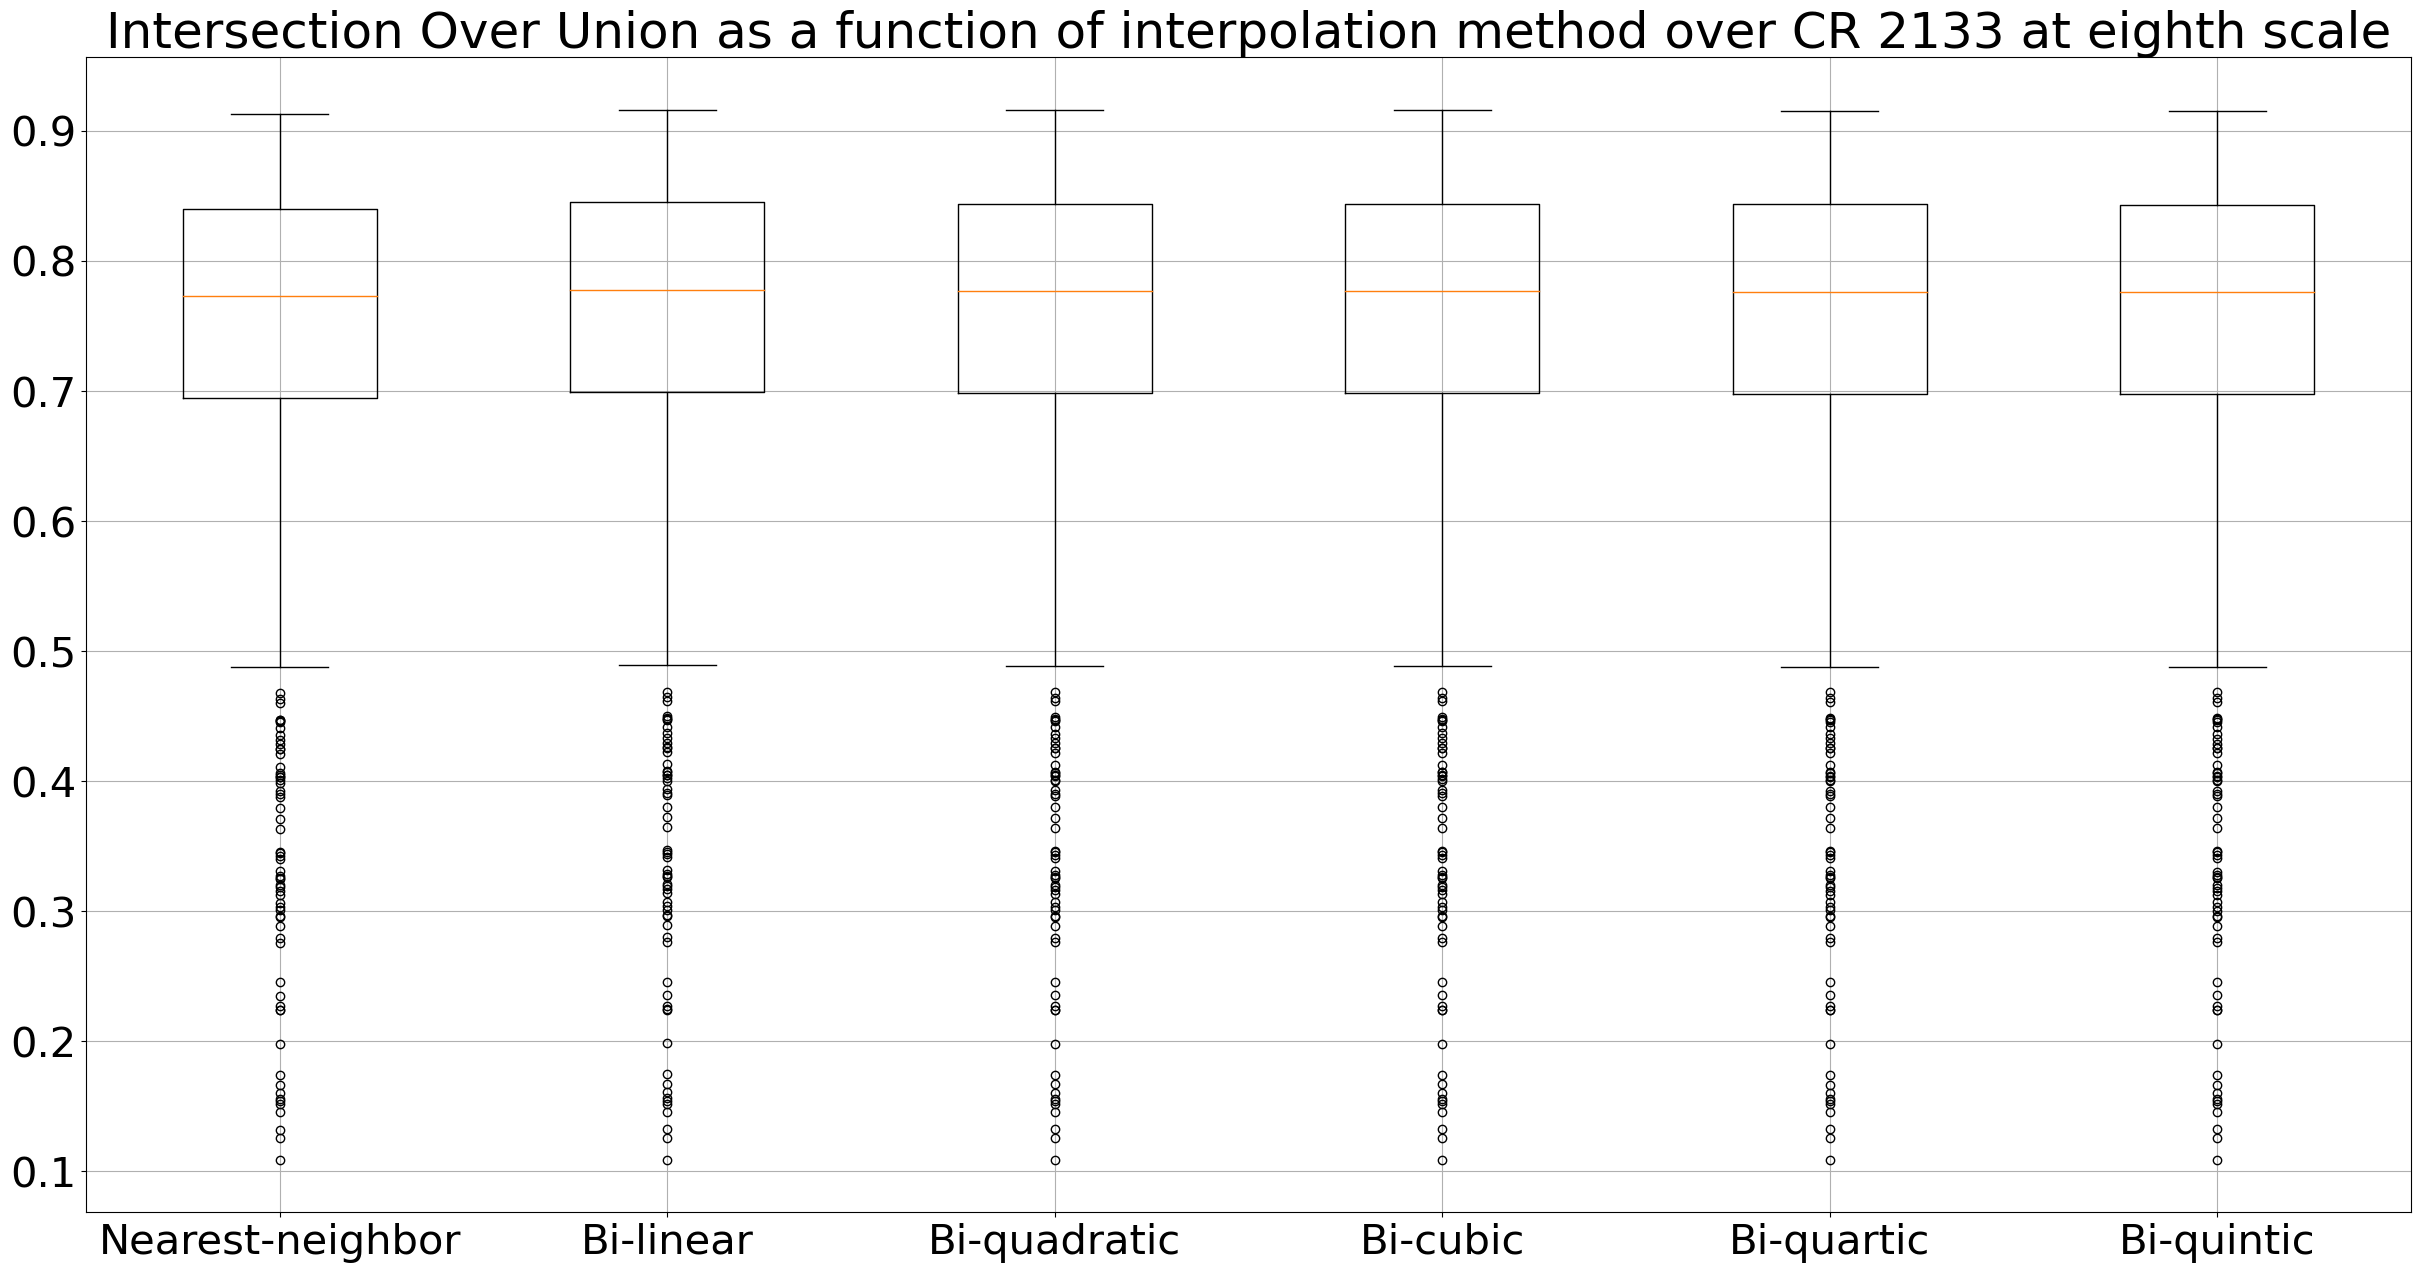

In [8]:
# Plots for 1/8th scale

# Extract Data for 1/8 scale Interploation
IOU8  = IOU[:,2,:]

# Set up lables
x = np.arange(len(upscale)) + 1

# Plot and save results - IOU
plt.figure(figsize=[30,15])
title = 'Intersection Over Union as a function of interpolation method over CR '
title = title + cr[2:] + ' at eighth scale'
plt.rcParams.update({'font.size': 30})
plt.title(title)
plt.boxplot(IOU8)
plt.xticks(x,upscale)
plt.grid()
title = saveDirectory + 'IOU_Box_' + cr +'.8.eps'
plt.savefig(title)
plt.show()

In [9]:
# Calculate Stats

# # Calculate Stats for alpha == 0.3
# meanIOU  = np.nanmean(IOU[np.where(alphas==0.3)[0],:,:],axis=0)
# stdIOU   = np.nanstd(IOU[np.where(alphas==0.3)[0],:,:],axis=0)
# meanSSIM = np.nanmean(SSIM[np.where(alphas==0.3)[0],:,:],axis=0)
# stdSSIM  = np.nanstd(SSIM[np.where(alphas==0.3)[0],:,:],axis=0)
# meanGCE  = np.nanmean(GCE[np.where(alphas==0.3)[0],:,:],axis=0)
# stdGCE   = np.nanstd(GCE[np.where(alphas==0.3)[0],:,:],axis=0)
# meanLCE  = np.nanmean(LCE[np.where(alphas==0.3)[0],:,:],axis=0)
# stdLCE   = np.nanstd(LCE[np.where(alphas==0.3)[0],:,:],axis=0)

# # Calculate Stats for alpha != 0.3
# meanIOUother  = np.nanmean(IOU[np.where(alphas!=0.3)[0],:,:],axis=0)
# stdIOUother   = np.nanstd(IOU[np.where(alphas!=0.3)[0],:,:],axis=0)
# meanSSIMother = np.nanmean(SSIM[np.where(alphas!=0.3)[0],:,:],axis=0)
# stdSSIMother  = np.nanstd(SSIM[np.where(alphas!=0.3)[0],:,:],axis=0)
# meanGCEother  = np.nanmean(GCE[np.where(alphas!=0.3)[0],:,:],axis=0)
# stdGCEother   = np.nanstd(GCE[np.where(alphas!=0.3)[0],:,:],axis=0)
# meanLCEother  = np.nanmean(LCE[np.where(alphas!=0.3)[0],:,:],axis=0)
# stdLCEother   = np.nanstd(LCE[np.where(alphas!=0.3)[0],:,:],axis=0)

# Calculate Stats for full dataset
meanIOUfull  = np.nanmean(IOU,axis=0)
stdIOUfull   = np.nanstd(IOU,axis=0)
meanSSIMfull = np.nanmean(SSIM,axis=0)
stdSSIMfull  = np.nanstd(SSIM,axis=0)
meanGCEfull  = np.nanmean(GCE,axis=0)
stdGCEfull   = np.nanstd(GCE,axis=0)
meanLCEfull  = np.nanmean(LCE,axis=0)
stdLCEfull   = np.nanstd(LCE,axis=0)

In [10]:
# Show Resutls
print('Mean IOU:')
for i in range(len(meanIOUfull)):
    
    print('   ',keysFormated[i])
    
    for j in range(len(meanIOUfull[i])):
        
        print('       ',upscale[j])
        print('           ',meanIOUfull[i,j],'+-',stdIOUfull[i,j])
        
    print('        Range:',np.max(meanIOUfull[i])-np.min(meanIOUfull[i]))

Mean IOU:
    Half Scale
        Nearest-neighbor
            0.8268359654759988 +- 0.11540579653854446
        Bi-linear
            0.8268359654759988 +- 0.11540579653854446
        Bi-quadratic
            0.8268341199932812 +- 0.11540583014061645
        Bi-cubic
            0.8268359654759988 +- 0.11540579653854446
        Bi-quartic
            0.8263311239691635 +- 0.11532063511972766
        Bi-quintic
            0.8261586694157599 +- 0.11529549405108795
        Range: 0.0006772960602389189
    Quarter Scale
        Nearest-neighbor
            0.7648658986895052 +- 0.15002615489237842
        Bi-linear
            0.7667517903647249 +- 0.15050474296311014
        Bi-quadratic
            0.7661948862422361 +- 0.1504664482764118
        Bi-cubic
            0.7663288820520756 +- 0.15048271993586318
        Bi-quartic
            0.7660952905718681 +- 0.1504665040447337
        Bi-quintic
            0.7660190447773018 +- 0.15045878712652216
        Range: 0.0018858916752196864